In [102]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

Confusion matrix:
      Down  Up
Down    48  55
Up      63  86 

Prediction accuracy: 0.53


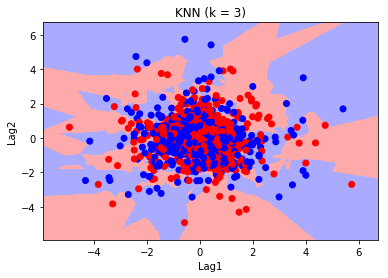

In [107]:
# Read data
smarket = pd.read_csv('../Labs 4.6.1/Data/Smarket.csv', usecols = range(1,10))

train = smarket[smarket.Year < 2005].copy()
test = smarket[smarket.Year >= 2005].copy()

#knn = KNeighborsClassifier(n_neighbors=k)
X_train = train[['Lag1','Lag2']]
y_train = train['Direction']
X_test = test[['Lag1','Lag2']]
y_test = test['Direction']

accuracy = KNN(3, X_train, y_train, X_test, y_test, True)
plt.xlabel('Lag1')
plt.ylabel('Lag2')
plt.savefig('KNN_boundary_3.png', dpi = 400)
print("Prediction accuracy: %0.2f" % accuracy)

In [101]:
def KNN(k, X_train, y_train, X_test, y_test, print_confusion = False):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train);
    y_pred = knn.predict(X_test)
    if print_confusion:
        c_mat = pd.DataFrame(confusion_matrix(y_test, y_pred).T, columns = ['Down', 'Up'], index = ['Down', 'Up'])
        print('Confusion matrix:')
        print(c_mat, "\n")
        
        #step size in the mesh
        h = .02 

        #Create color maps
        cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
        cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
        
        X = np.array(X_train.values) 
        y = np.array([y_train == 'Up'])
        
        #Plot the decision boundary. For that, we will assign a color to each
        #point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = np.array([Z == 'Up'])

        #Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        #Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("KNN (k = %i)" % (k))
    return accuracy_score(y_test, y_pred)

Best k: 243


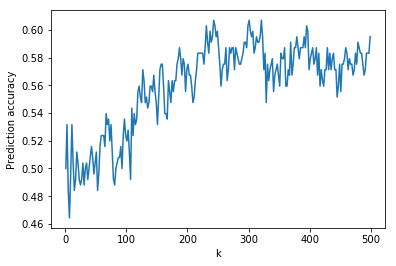

In [106]:
k = list(range(1,500,2))
a = np.ones(len(k))

for i in range(0,len(k)):
    a[i] = KNN(k[i], X_train, y_train, X_test, y_test, False)

plt.plot(k, a)
plt.xlabel('k')
plt.ylabel('Prediction accuracy')
plt.savefig('k_values.png', dpi = 400)

idx = list(a).index(max(a))
print("Best k: %i" % k[idx])